# Creating publication-quality plots

In this week's lesson we will discuss some general tips for creating high-quality plots using Matplotlib. The lesson is divided into two parts:

1. Creating publication-quality plots using Matplotlib
2. Considering accessibility in designing your plots

As was the case in the past weeks, the lesson does not follow a strict plan, but the content will be adjusted according to the input of those in attendance in the online sesson.

## Creating some fake data

First, we need to create some fake data that we can use for plotting. Rather than loading a data file we'll just generate some random data to give an idea of how the plot formatting can be applied. In our case we'll create two pandas DataFrames:

1. A set of x values and 4 sets of corresponding y values for plotting lines.
2. Random 1000 x-y points that can be used for plotting colors on scatter plots.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# DataFrame of lines

# Set number of points, x min and max, and offset between y-lines
num_points = 21
xmin = 0
xmax = 20
y_offset = 0.25

# Create DataFrame
lines_df = pd.DataFrame(columns=['x', 'y1', 'y2', 'y3', 'y4'])

# Create numpy arrays for dataframe columns
x = np.linspace(xmin, xmax, num_points)
y1 = np.random.rand(num_points)
y2 = np.random.rand(num_points) + y_offset
y3 = np.random.rand(num_points) + 2 * y_offset
y4 = np.random.rand(num_points) + 3 * y_offset

# Fill DataFrame with numpy values
lines_df['x'] = x
lines_df['y1'] = y1
lines_df['y2'] = y2
lines_df['y3'] = y3
lines_df['y4'] = y4

In [3]:
# DataFrame of scatter points

# Set number of points, x and y max
num_points = 1000
xmax = 20
ymax = 20
zmax = 20

# Create DataFrame
scatter_df = pd.DataFrame(columns=['x', 'y', 'z', 'color'])

# Create numpy arrays for dataframe values
x_pts = np.random.rand(num_points) * xmax
y_pts = np.random.rand(num_points) * ymax
z_pts = np.random.rand(num_points) * zmax
color = np.random.rand(num_points)

# Fill DataFrame values
scatter_df['x'] = x_pts
scatter_df['y'] = y_pts
scatter_df['z'] = z_pts
scatter_df['color'] = color

## Creating publication-quality plots using Matplotlib

### Matplotlib style sheets

Matplotlib has many different built-in styles that can be used for formatting the visual appearance of the plot. Many of these are nicer looking than the default plot settings. You can find information about the available plot styles in the [Matplotlib style sheets reference](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

<AxesSubplot:>

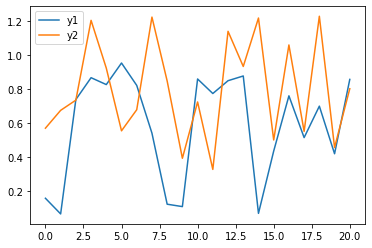

In [4]:
# Plot data for two lines
lines_df[['y1', 'y2']].plot()

You can specify a plot style to use with the `plt.style.use()` function.

<AxesSubplot:>

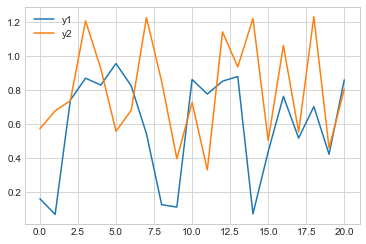

In [5]:
# Define plot style
plot_style = "seaborn-whitegrid"
plt.style.use(plot_style)

# Plot data for two lines
lines_df[['y1', 'y2']].plot()

### Using colormaps for line colors

Matplotlib also has a large number of [built-in colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) that can be used to define colors of plot objects, often for things like filled contour plots. If you would like to have such colormaps be used for plotting lines on a plot, which you might like to do if you have a series of plot lines for different time periods, for example, you can do this using the `plt.cm.colormap()` function, where the word `colormap` in the function would be replaced by a matplotlib colormap. Let's see an example.

<AxesSubplot:>

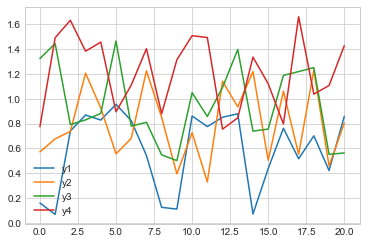

In [6]:
# Original plot, now for four lines
lines_df[['y1', 'y2', 'y3', 'y4']].plot()

<AxesSubplot:>

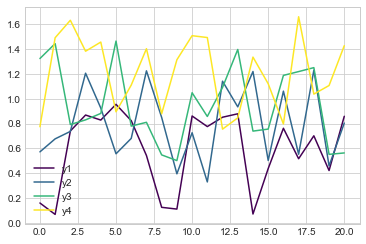

In [7]:
# Define colors to use from inferno colormap
colors = plt.cm.viridis(np.linspace(0, 1, 4))

# Modified plot with colormap colors for four lines
lines_df[['y1', 'y2', 'y3', 'y4']].plot(color=colors)

<AxesSubplot:>

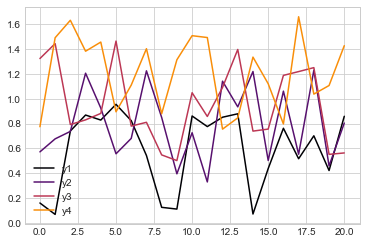

In [8]:
# Note you can change the range of colors by changing the range
# of numbers between 0 and 1 in the np.linspace() function
colors = plt.cm.inferno(np.linspace(0, 0.75, 4))

# Modified plot with colormap colors for four lines
lines_df[['y1', 'y2', 'y3', 'y4']].plot(color=colors)

<AxesSubplot:>

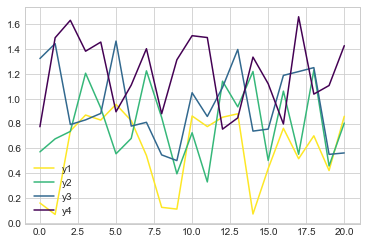

In [9]:
# Also note that you can reverse the order of colors by adding "_r" to
# the end of the name of the colormap

# Define colors to use from inferno colormap
colors = plt.cm.viridis_r(np.linspace(0, 1, 4))

# Modified plot with colormap colors for four lines
lines_df[['y1', 'y2', 'y3', 'y4']].plot(color=colors)

### More advanced subplot layouts

Not discussed. If you're interested, check out the [Gridspec documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html) or this [article about using Gridspec](https://www.pythonpool.com/matplotlib-gridspec/).

### Formatting plot ticks

Not discussed. If you want to learn about how to format plot ticks, check out the [Matplotlib documentation on formatting tick labels](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.ticklabel_format.html).

### Saving plots in high resolution raster or vector formats

The `plt.savefig()` function can be used to save plots. It normally should be placed in the same code cell as that which produces the plot. The required value for the function is the name of the file where the plot should be saved.

#### Raster plots

- Raster images can be saved by listing a filename with a file extension such as "jpg" or "png".
- The resolution of the image can be defined using the "dpi" parameter, such as `dpi=300`.

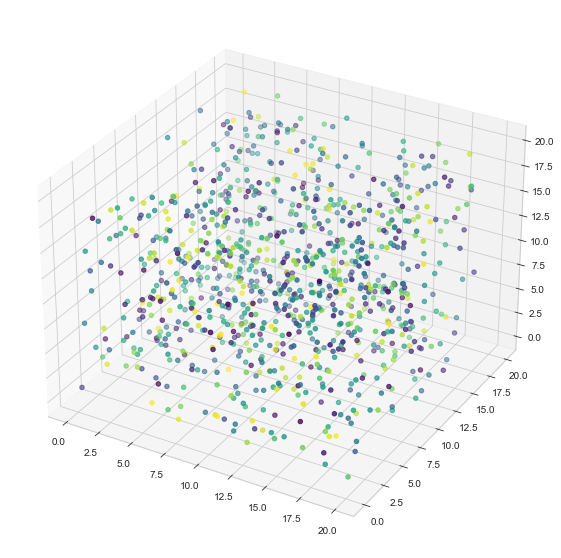

In [10]:
# Create figure and axis
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

# Plot data
ax.scatter(x_pts, y_pts, z_pts, c=color, cmap='viridis')

# Save as 300 dpi jpg file
plt.savefig('3d-test.jpg', dpi=300)

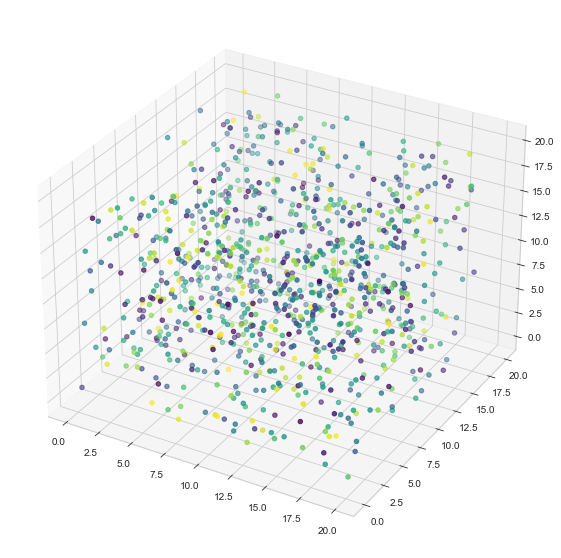

In [11]:
# Create figure and axis
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

# Plot data
ax.scatter(x_pts, y_pts, z_pts, c=color, cmap='viridis')

# Save as 150 dpi png file
plt.savefig('3d-test.png', dpi=150)

#### Vector plots

- Vector formats of images can be saved using the "svg" or "eps" file extension

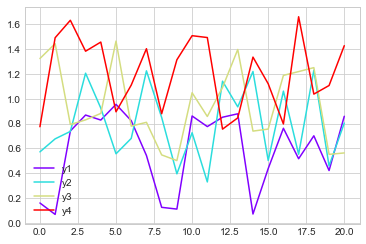

In [12]:
# Define colors to use from rainbow colormap
colors = plt.cm.rainbow(np.linspace(0, 1, 4))

# Modified plot with colormap colors for four lines
lines_df[['y1', 'y2', 'y3', 'y4']].plot(color=colors)

# Save plot as an svg file
plt.savefig('lines-test.svg')

#### Saving a PDF

It is also possible to save images as pdf files using the "pdf" file extension.

### Creating 3D plots

This is a quick demo of how to create a 3D plot of scatter data. The key thing here is the `projection=3d` when creating the plot axes.

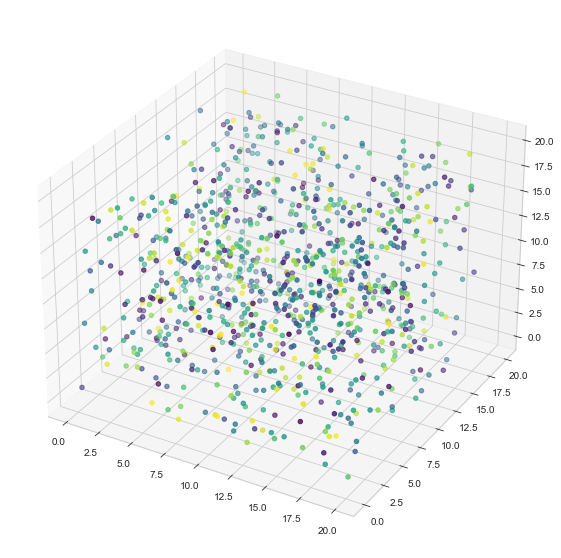

In [13]:
# Create figure and axis
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(x_pts, y_pts, z_pts, c=color, cmap='viridis')

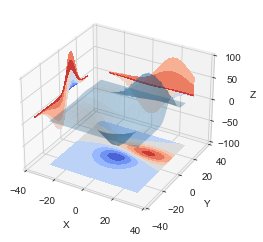

In [14]:
# Example from the Matplotlib plot gallery

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph
ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set(xlim=(-40, 40), ylim=(-40, 40), zlim=(-100, 100),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()

### Creating ternary diagrams

Not discussed.

### Other handy tips

#### Reversing plot axes

Plot axes can be reversed in two ways:

1. Using the `plt.gca().invert_xaxis()` or `plt.gca().invert_yaxis()` function
2. Inverting the min and max values when defining axis limits

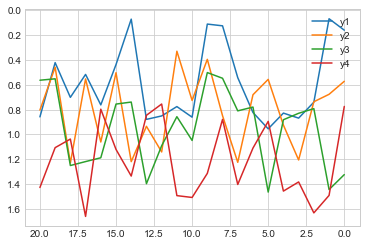

In [15]:
# Original plot, now for four lines
lines_df[['y1', 'y2', 'y3', 'y4']].plot()

# Invert x-axis, y-axis
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

(1.75, 0.0)

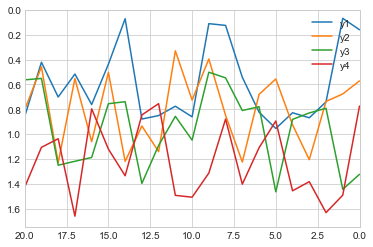

In [16]:
# Original plot, now for four lines
ax = lines_df[['y1', 'y2', 'y3', 'y4']].plot()

# Invert x-axis, y-axis using axis limits
ax.set_xlim([20.0, 0.0])
ax.set_ylim([1.75, 0.0])

#### Filling between lines

Not discussed. Check out the Matplotlib documentation on [fill_between](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) and [fill_betweenx](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_betweenx.html) if you are curious.

#### Using f-strings for plot labels and titles

Not discussed, but it is possible to use f-strings to have variables in plot axis labels, titles, and legend labels. Just put in a f-string in place of the normal text string.

### Sometimes manual editing is still required (or faster)

Practically speaking, I do most of the plot formatting in Python, but often clean things up in another program such as Adobe Illustrator, Inkscape, CorelDRAW, or Affinity Designer. Certain formatting processes are simply easier to customize by hand. (Geochron paper example)

## Considering accessibility in plot design

### Tips for creating line plots

Rather than relying on color alone to distinguish lines, you can also vary the line pattern to make it easier to know which line is which. You can specify line styles using the `style` parameter when plotting with pandas.

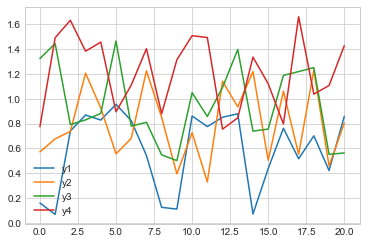

In [17]:
# Original plot, now for four lines
ax = lines_df[['y1', 'y2', 'y3', 'y4']].plot()

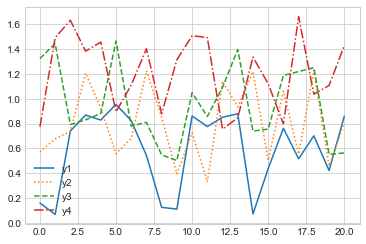

In [18]:
# Modified plot with different linestyles
ax = lines_df[['y1', 'y2', 'y3', 'y4']].plot(style=['-', ':', '--', '-.'])

### Choosing colormaps

Different colormaps should be used for different purposes.

- Sequential: Lightness increases monotonically in the colors
- Diverging: Color diverges on either side of a neutral value in the middle of the color range
- Cyclic: Colors at either end of the colormap are equal
- Qualitative: Often used to classify data values that are discrete

You can find examples and more information on the [Matplotlib colormaps page](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

#### Supporting colorblind viewers

Perceptually uniform colormaps aim to not distort data and to be inclusive for viewers with vision issues such as colorblindness. Matplotlib has several perceptually uniform colormaps that are available:

- viridis
- plasma
- inferno
- magma
- cividis

#### Avoiding data distortion

The colormaps above also aim to avoid data distortion, such as large color changes across small variations in the data.

## Resources

- [s-ink science graphics collection](https://s-ink.org/)
- [Scientific color maps](https://www.fabiocrameri.ch/colourmaps/)
- [Matplotlib plot gallery](https://matplotlib.org/stable/gallery/index.html)
- [Coblis colorblindess simulator](https://www.color-blindness.com/coblis-color-blindness-simulator/)
- [SciPy 2015 conference presentation on perceptually uniform colormaps](https://youtu.be/xAoljeRJ3lU)


## Topics for the next class

- Basic geostatistics
- Monte Carlo example?
    - Isotope systems?